# Задача 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

$\mathcal{L}(x_0, y_0) = \sum ((x_i - x_0)^2 + (y_i - y_0)^2)$  
$\mathcal{L}(R) = \sum (\sqrt{(x_i - x_0)^2 + (y_i - y_0)^2} - R)^2$  

In [2]:
def dist_to_center(x_0, y_0, x_array, y_array):
    return np.sum((np.array(x_array) - x_0) ** 2 + (np.array(y_array) - y_0) ** 2)

def dist_to_circle(r, x_0, y_0, x_array, y_array):
    return np.sum((np.sqrt((np.array(x_array) - x_0) ** 2 + (np.array(y_array) - y_0) ** 2) - r) ** 2)

def draw_circle(r, x_0, y_0, N=100):
    return x_0 + r * np.cos(np.linspace(0, 2*np.pi, N)), y_0 + r * np.sin(np.linspace(0, 2*np.pi, N))

In [3]:
points_x = np.array([1, 1, 2, 3]) 
points_y = np.array([-1, 2, 2, 0])

center_res = minimize(lambda p: dist_to_center(p[0], p[1], points_x, points_y), [0, 0])
x_0, y_0 = center_res.x
print("Координаты центра:", x_0, y_0)

radius_res = minimize(lambda r: dist_to_circle(r, x_0, y_0, points_x, points_y), 0)
r_0 = radius_res.x[0]
print("Радиус:", r_0)

Координаты центра: 1.7499999607838919 0.7499999831930964
Радиус: 1.5235435296756896


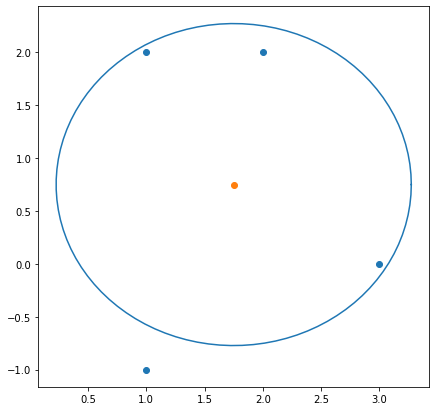

In [4]:
plt.figure(figsize=(7, 7))
plt.scatter(points_x, points_y)
plt.scatter(x_0, y_0)
circ_x, circ_y = draw_circle(r_0, x_0, y_0)
plt.plot(circ_x, circ_y)

# Задача 2

In [5]:
from scipy.optimize import newton


In [6]:
coeffs = (1, -11, 9, 11, -10)
poly = np.poly1d(coeffs)

У полинома 3 корня: $x_1 = -1, x_2 = 1, x_3 = 10$  
Наибольший по модулю корень $x_3 = 10$

Text(0.5, 1.0, 'Доля полщади = 0.0282')

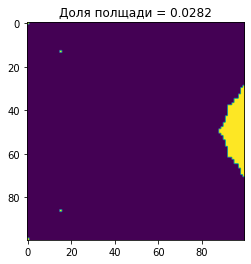

In [7]:
N = 100
real_domain = np.linspace(-10, 10, N)
im_domain = np.linspace(-10, 10, N) * (-1j)
domain = im_domain.reshape(-1, 1) + real_domain.reshape(1, -1)

conv_to_10 = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        point = domain[i, j]
        solution = newton(poly, point, poly.deriv(1))
        if np.allclose(solution, 10):
            conv_to_10[i, j] = 1

plt.imshow(conv_to_10)
plt.title(f"Доля полщади = {np.sum(conv_to_10) / N**2}")

# Задача 3

Наилучшее приближение может быть вычисленно при помощи SVD - Теорема Эккарта-Янга

In [8]:
def first_degree_approx(A):
    u, s, wh = np.linalg.svd(A)
    u_0 = u[:, :1]
    s_0 = s[:1]
    wh_0 = wh[:1, :]
    error = np.linalg.norm(A - u_0 @ wh_0 * s_0, ord='fro') / np.linalg.norm(A, ord='fro')
    return error, u_0 * s_0, wh_0
    
def n_degree_approx(A, n):
    u, s, wh = np.linalg.svd(A)
    u_n = u[:, :n]
    s_n = s[:n]
    wh_n = wh[:n, :]
    A_approx = u_n @ np.diag(s_n) @ wh_n
    error = np.linalg.norm(A - A_approx, ord='fro') / np.linalg.norm(A, ord='fro')
    return error, u_n @ np.diag(s_n), wh_n

In [9]:
B = np.random.normal(size=(10, 10))
print(first_degree_approx(B)[0])

0.8276867876456261


Найдём точное приближение параметром точности минимально допустимпая ошибка.

In [10]:
def find_optimal_approx(A, min_error=0.1):
    n = np.min(A.shape)
    for i in range(n):
        err, u, v = n_degree_approx(A, i + 1)
        if err < min_error:
            return i + 1, u, v

In [11]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float

cat = rgb2gray(img_as_float(data.chelsea())) 

N, U, V = find_optimal_approx(cat)
print("Для кошки оптимальным стало разложение порядка:", N)

Для кошки оптимальным стало разложение порядка: 13


# Задача 4

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
A = digits.data
y = digits.target
print(A.shape, y)

(1797, 64) [0 1 2 ... 8 9 8]


Произведём норимровку для изображения

In [13]:
A_norm = A / np.max(A)

Получим изображения нескольких картинок

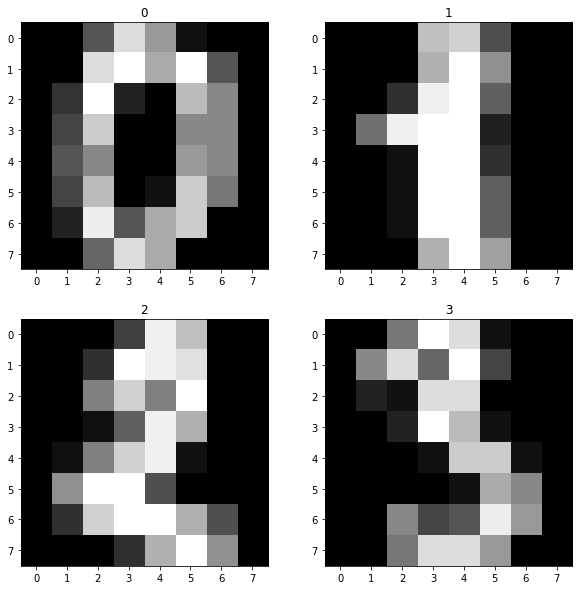

In [14]:
plt.figure(figsize=(10, 10))
numbers = [0, 4, 7, 35]

for i in range(4):
    plt.subplot(int(f"22{i + 1}"))
    plt.imshow(A_norm[i].reshape(8, 8), cmap="gray")
    plt.title(y[i])

Нормировка и центрировка

In [15]:
from sklearn.preprocessing import StandardScaler
A_std = StandardScaler().fit_transform(A)

Разложим по SVD и изобразим проекции на главные переменные

(1797, 2)


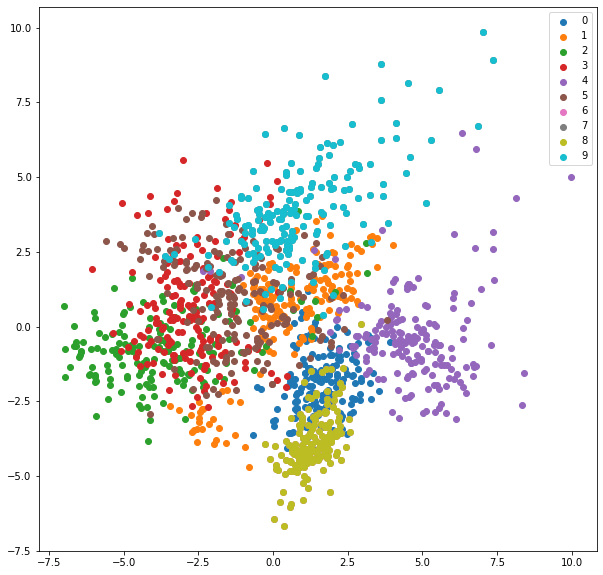

In [16]:
u, s, wh = np.linalg.svd(A_std)
projections = u[:, :2] @ np.diag(s[:2])
print(projections.shape)

plt.figure(figsize=(10, 10))

plt.scatter(projections[:, 0][y ==  0], projections[:, 1][y == 0], label="0")
plt.scatter(projections[:, 0][y ==  1], projections[:, 1][y == 1], label="1")
plt.scatter(projections[:, 0][y ==  2], projections[:, 1][y == 2], label="2")
plt.scatter(projections[:, 0][y ==  3], projections[:, 1][y == 3], label="3")
plt.scatter(projections[:, 0][y ==  4], projections[:, 1][y == 4], label="4")
plt.scatter(projections[:, 0][y ==  5], projections[:, 1][y == 5], label="5")
plt.scatter(projections[:, 0][y ==  6], projections[:, 1][y == 6], label="6")
plt.scatter(projections[:, 0][y ==  7], projections[:, 1][y == 7], label="7")
plt.scatter(projections[:, 0][y ==  6], projections[:, 1][y == 6], label="8")
plt.scatter(projections[:, 0][y ==  7], projections[:, 1][y == 7], label="9")

plt.legend()

# Задача 5

In [17]:
import scipy.stats as sps

In [18]:
coin = sps.binom(1, 0.5)
bad_coin = sps.binom(1, 0.4)
print(np.mean(coin.rvs(100)))
print(np.mean(bad_coin.rvs(100)))

0.45
0.34


In [19]:
N_g = 10000
N_b = 10000
good_coins = coin.rvs((N_g, 5))
bad_coins = bad_coin.rvs((N_b, 5))

Возьмём в качестве критерия хорошей монеты то, что среднее > 0.45

In [20]:
good_coins_results = np.mean(good_coins, axis=1) > 0.45
bad_coins_results = np.mean(bad_coins, axis=1) > 0.45

In [21]:
true_positive = np.sum(good_coins_results)
false_negative = N_g - true_positive
false_positive = np.sum(bad_coins_results)
true_negative = N_b - false_positive

In [22]:
print("Таблица")
print('', true_positive, false_positive, '\n', false_negative, true_negative)

Таблица
 4958 3205 
 5042 6795


Точность

In [23]:
(true_positive + true_negative) / (N_g + N_b)

0.58765

Доля ошибок

In [24]:
(false_negative + false_positive) / (N_g + N_b)

0.41235

Полнота

In [25]:
true_positive / N_g

0.4958

F мера

In [26]:
2 / (1 / (true_positive/(true_positive + false_positive)) + 1 / (true_positive / N_g))

0.5459450531299895

Найдём зависимость F меры

In [27]:
def F(N):
    N_g = 1000
    N_b = 1000
    good_coins = coin.rvs((N_g, N))
    bad_coins = bad_coin.rvs((N_b, N))
    good_coins_results = np.mean(good_coins, axis=1) > 0.45
    bad_coins_results = np.mean(bad_coins, axis=1) > 0.45
    true_positive = np.sum(good_coins_results)
    false_negative = N - true_positive
    false_positive = np.sum(bad_coins_results)
    true_negative = N - false_positive
    return 2 / (1 / (true_positive/(true_positive + false_positive)) + 1 / (true_positive / N_g))

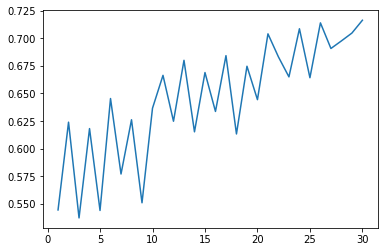

In [28]:
ns = np.arange(1, 31)
fs = np.zeros(30)
for i in range(30):
    fs[i] = F(ns[i])
    
plt.plot(ns, fs)